Group: Melker Gustafsson, Pontus Gideflod, Ismail Sacic
# TASK 1
### Step 1

In [1]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path)

testdata = load_data('adult_test.csv')
traindata = load_data('adult_train.csv')

Ytest = testdata['target']
Ytrain = traindata['target']
Xtest = testdata.drop('target', axis=1)
Xtrain = traindata.drop('target', axis=1)

### Step 2

In [2]:
Xtrain_dict = Xtrain.to_dict('records')
Xtest_dict = Xtest.to_dict('records')

from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

Xtrain_encoded = dv.fit_transform(Xtrain_dict)
Xtest_encoded = dv.transform(Xtest_dict)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

clf1 = DecisionTreeClassifier(random_state=0, max_depth=7)
clf2 = RandomForestClassifier(random_state=0)
clf3 = GradientBoostingClassifier(random_state=0)
clf4 = Perceptron(random_state=0)
clf5 = LogisticRegression(random_state=0, max_iter=2000)
clf6 = LinearSVC(random_state=0, max_iter=2000)
clf7 = MLPClassifier(random_state=0, max_iter=500)

classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7]
classifier_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Perceptron',
                    'Logistic Regression', 'Linear SVC', 'MLP Classifier']

from sklearn.model_selection import cross_val_score
import numpy as np

# Used to compare classifiers
def compare_classifiers(Xtrain_encoded, Ytrain, classifiers, classifier_names):
    for clf, name in zip(classifiers, classifier_names):
        crossArray = cross_val_score(clf, Xtrain_encoded, Ytrain)
        score = np.mean(crossArray)
        print(f'{name} average cross-validation score: {score}')
    
compare_classifiers(Xtrain_encoded, Ytrain, classifiers, classifier_names)    

from sklearn.metrics import accuracy_score

# Gradient Boosting Classifier selected based on the best cross-validation score
clf3.fit(Xtrain_encoded, Ytrain)
Yguess = clf3.predict(Xtest_encoded)

print(f"Final Test Accuracy: {accuracy_score(Ytest, Yguess)}")

Decision Tree average cross-validation score: 0.8555020227924419
Random Forest average cross-validation score: 0.8467491260155932
Gradient Boosting average cross-validation score: 0.8656675592304335
Perceptron average cross-validation score: 0.7660086178050249


c:\Users\smelk\ChalmersCode\AML (DAT341)\Applied-Machine-Learning-DAT341-\sklearn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\smelk\ChalmersCode\AML (DAT341)\Applied-Machine-Learning-DAT341-\sklearn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
Yo

Logistic Regression average cross-validation score: 0.8509260396236444
Linear SVC average cross-validation score: 0.8515094975424317
MLP Classifier average cross-validation score: 0.8485305093838027
Final Test Accuracy: 0.871199557766722


### Step 3

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
  
pipeline = make_pipeline(
    DictVectorizer(), # Convert data to correct format
    StandardScaler(with_mean=False), # Scales features to better suit the model
    SelectKBest(f_classif, k=50), # Selects the best 50 features based on f_classif
    GradientBoostingClassifier() # Our chosen classifier
)

pipeline.fit(Xtrain_dict, Ytrain)
Yguess_pipeline = pipeline.predict(Xtest_dict)
print(f"Final Test Accuracy with Pipeline: {accuracy_score(Ytest, Yguess_pipeline)}")

Final Test Accuracy with Pipeline: 0.8699097107057306


The pipeline did get a bit worse results however this is due to the f_classif evaluator being meant for numerical features but our data does have class based data as well. Seperating what test to use on what feature is possible if we would've used ColumnTransformer instead of DictVectorizer.

# TASK 2
### Step 1

In [4]:
from matplotlib import pyplot as plt

def plot_classifier_scores(train_scores, test_scores, trees=0):
    # Sort the depths for proper plotting
    train_depths = sorted(train_scores.keys())
    test_depths = sorted(test_scores.keys())

    # Get the corresponding scores
    train_y = [train_scores[d] for d in train_depths]
    test_y = [test_scores[d] for d in test_depths]

    # Plot the lines
    plt.figure(figsize=(12, 10))
    plt.plot(train_depths, train_y, label='Train Classifier', marker='o')
    plt.plot(test_depths, test_y, label='Test Classifier', marker='s')

    # Add labels and title
    plt.xlabel('Depth of Classifier')
    plt.ylabel('Evaluation Score (Accuracy)')
    if trees > 0:
        plt.title(f'Classifier Evaluation Scores vs Depth (Trees: {trees})')
    else:
        plt.title('Classifier Evaluation Scores vs Depth')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.6, 1.0)
    plt.show()
    

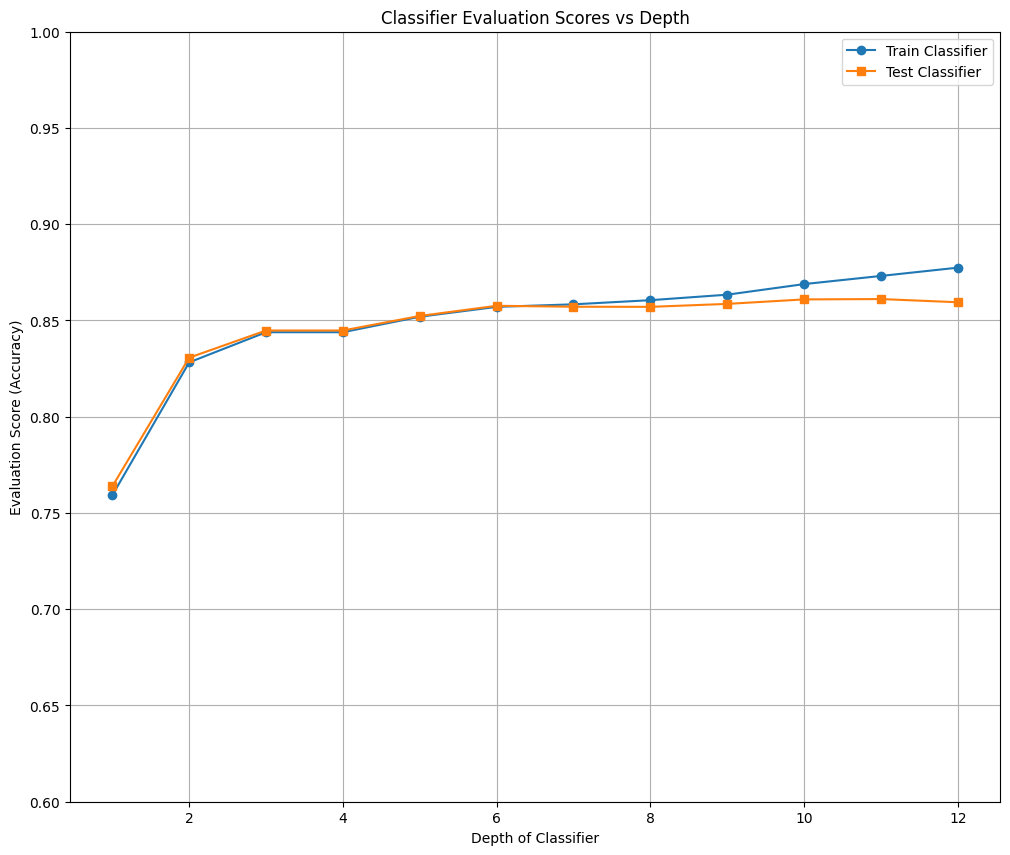

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

custom_depths = range(1, 13)
test_dict = {}
train_dict = {}
for d in custom_depths:
    pipeline = make_pipeline(
        DictVectorizer(), # Convert data to correct format
        StandardScaler(with_mean=False), # Scales features to better suit the model
        SelectKBest(f_classif, k=50), # Selects the best 50 features based on f_classif
        DecisionTreeClassifier(max_depth=d) # Our chosen classifier
    )
    
    pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
    train_score = pipeline.score(Xtrain.to_dict(orient='records'), Ytrain)
    test_score = pipeline.score(Xtest.to_dict(orient='records'), Ytest)
    train_dict[d] = train_score
    test_dict[d] = test_score
    
plot_classifier_scores(train_dict, test_dict)

We can see that overfitting is still present since the training data accuracy always increases wityh depth while the test opne doesn't but the test data results do not decrease even close to as drastically as with our implemented version.

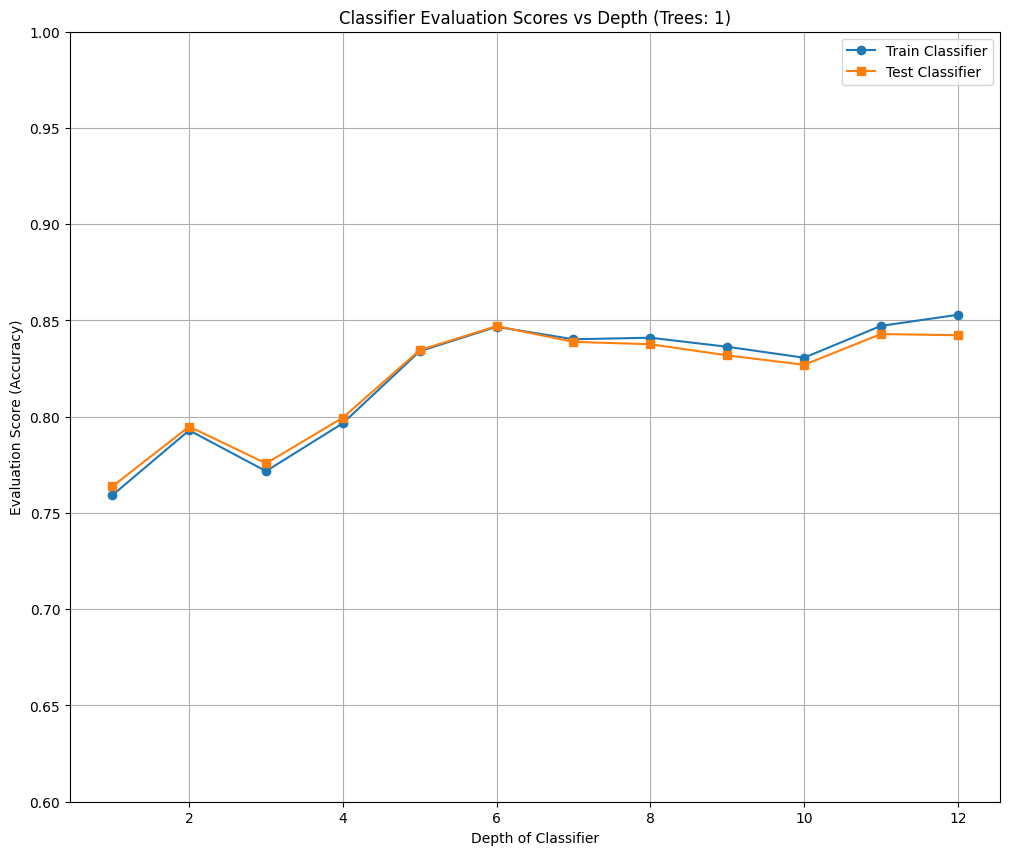

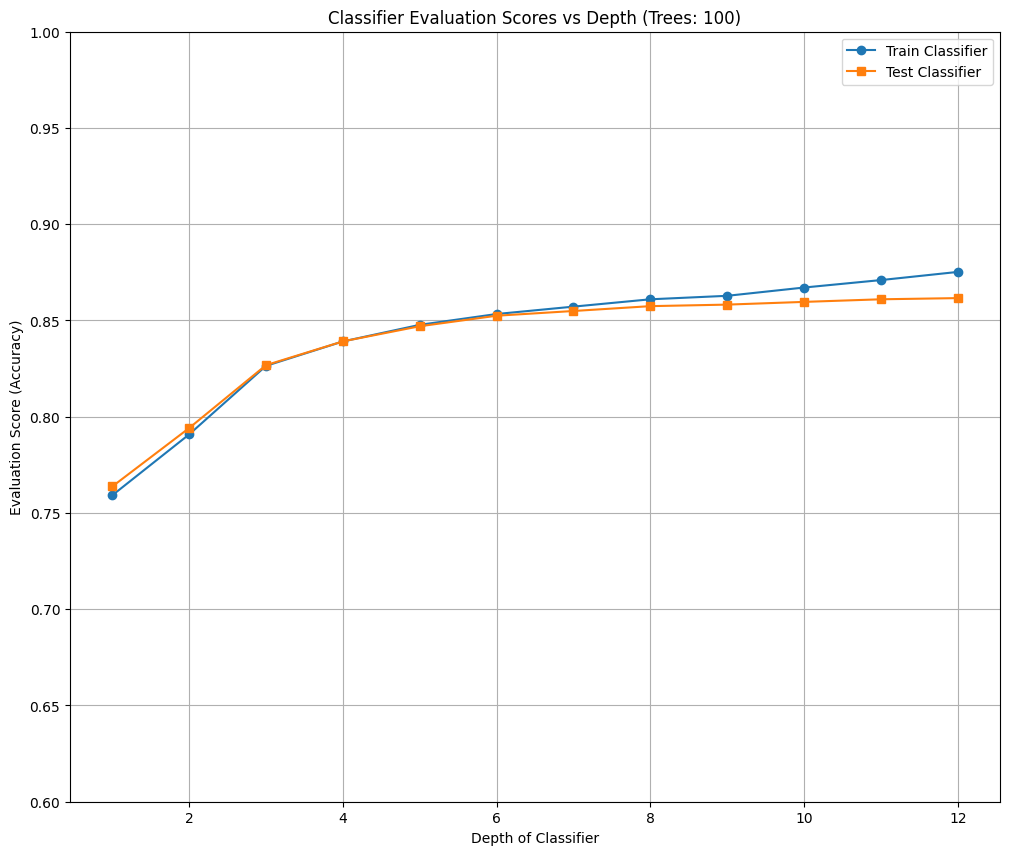

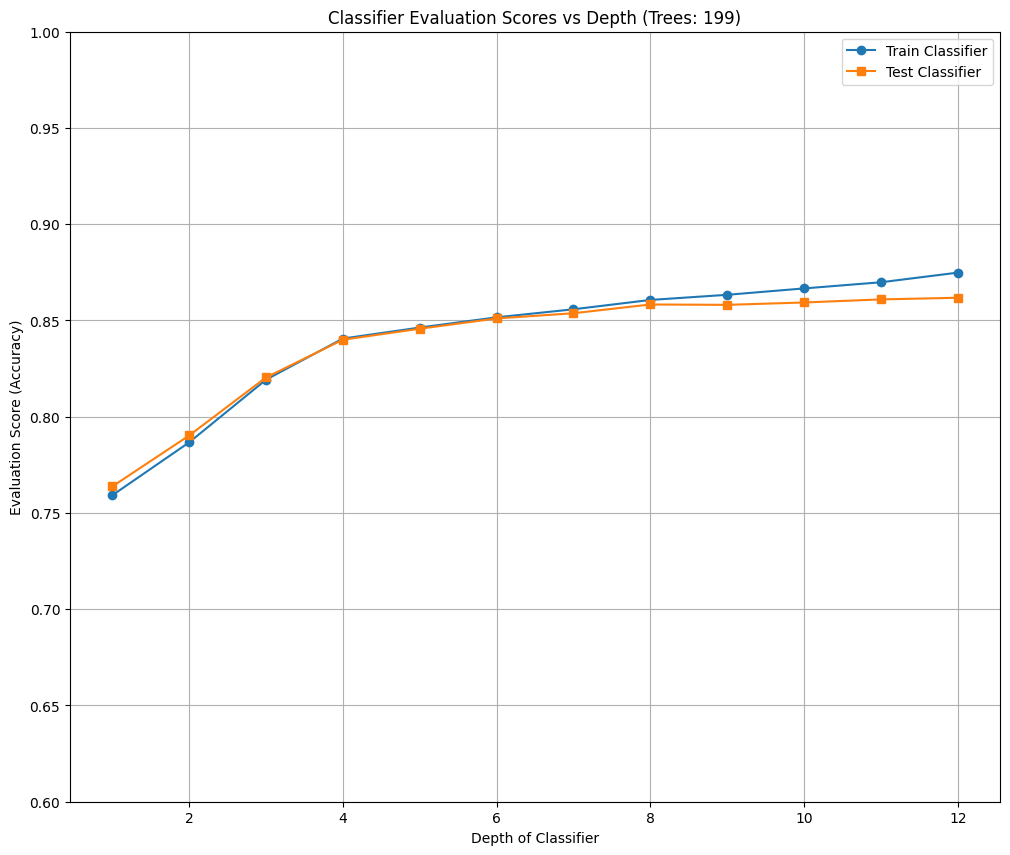

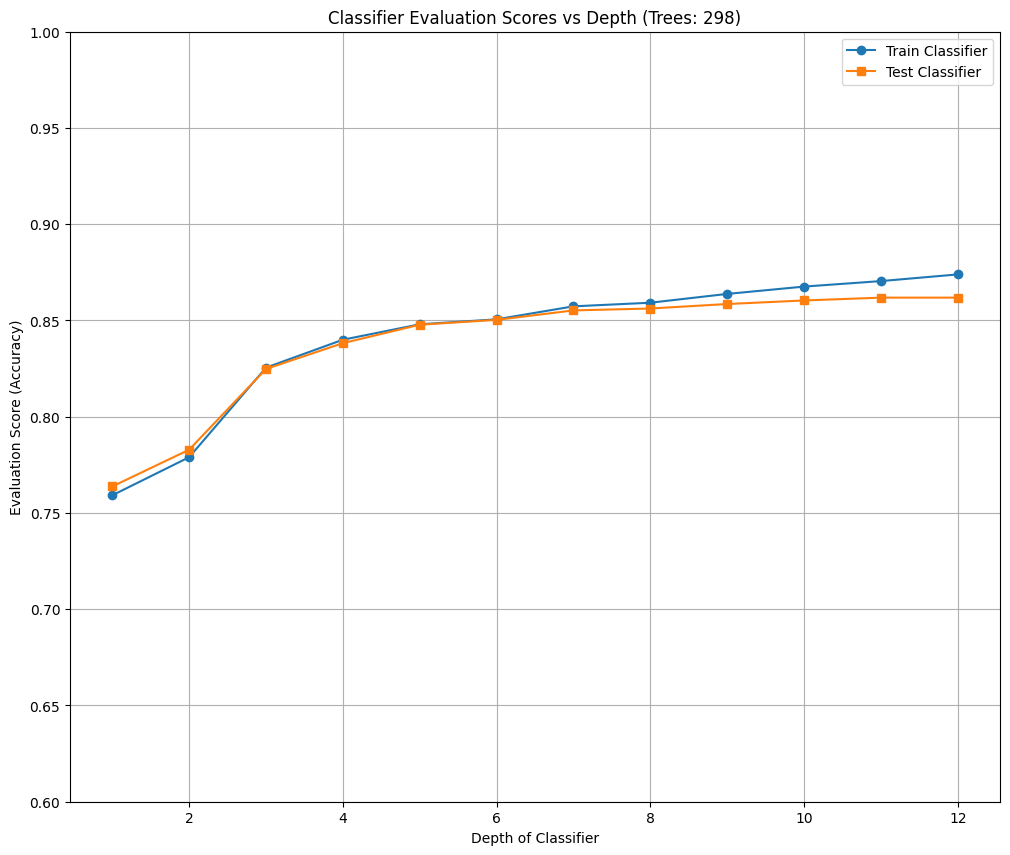

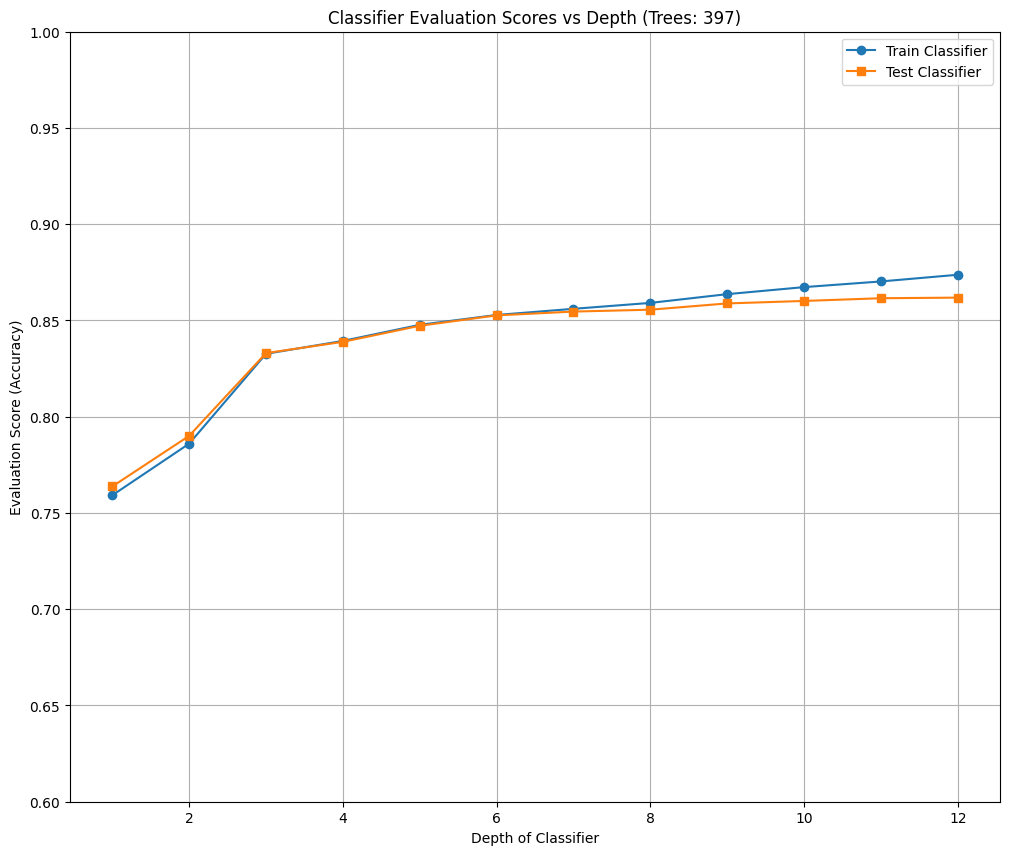

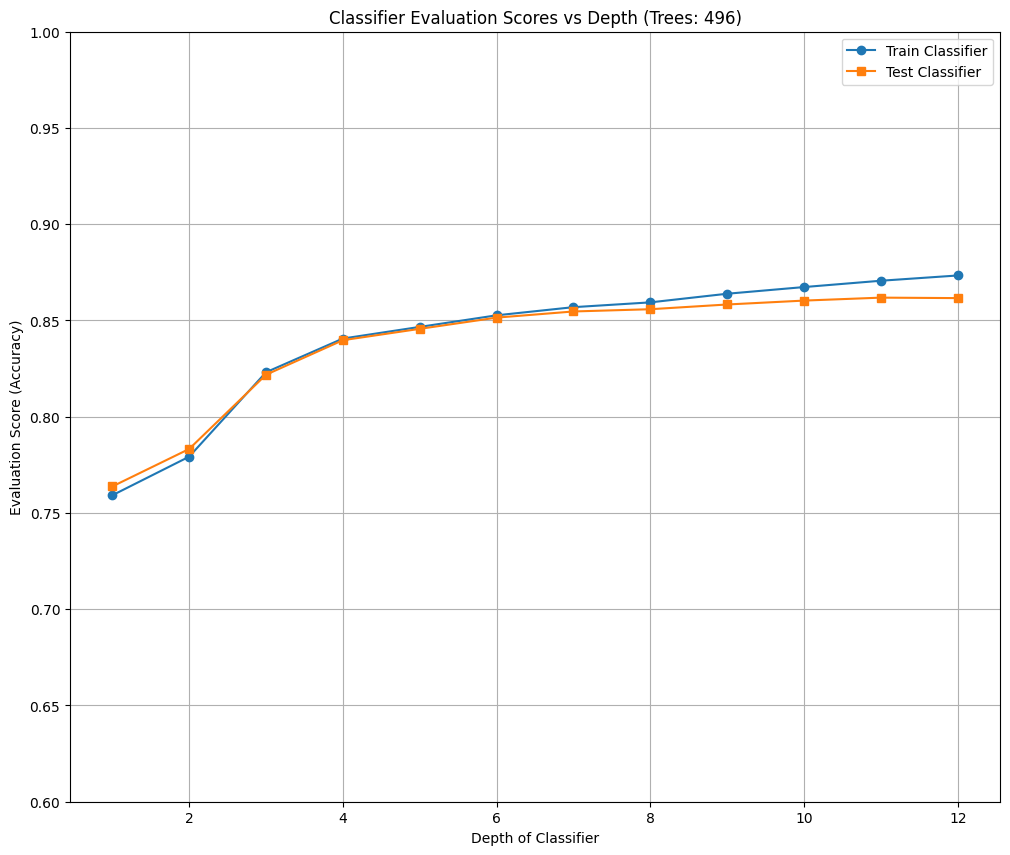

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
custom_depths = range(1, 13)
    
number_of_graphs = range(0, 6)
tree_growth = 99

for n in number_of_graphs:
    test_dict = {}
    train_dict = {}
    for d in custom_depths:
        pipeline = make_pipeline(
            DictVectorizer(), # Convert data to correct format
            StandardScaler(with_mean=False), # Scales features to better suit the model
            SelectKBest(f_classif, k=50), # Selects the best 50 features based on f_classif
            RandomForestClassifier(n_estimators=(tree_growth*n)+1, n_jobs=-1, max_depth=d) # Our chosen classifier
        )
        
        pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
        train_score = pipeline.score(Xtrain.to_dict(orient='records'), Ytrain)
        test_score = pipeline.score(Xtest.to_dict(orient='records'), Ytest)
        train_dict[d] = train_score
        test_dict[d] = test_score
    
    plot_classifier_scores(train_dict, test_dict, (n*tree_growth)+1)

- The Decision Tree curve shows us that it is a lot consistent in its improvement than the Random forrest one. This is because the Random forrest algorithm depends on the average of several trees so with only one it is super inconsistent.
- We can further see this as we look at the graphs with higher and higher number of trees as the graphs get smoother and smoother proportionally.
- As the ensamble size grows so does the best test accuracy but it plateaus after a certain amount.
- Training time increases with the ensamble size.

# TASK 3

In [7]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    DictVectorizer(), # Convert data to correct format
    StandardScaler(with_mean=False), # Scales features to better suit the model
    DecisionTreeClassifier(max_depth=7) # Our chosen classifier
)

pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('dictvectorizer', ...), ('standardscaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"dtype dtype: dtype, default=np.float64The type of feature values. Passed to Numpy array/scipy.sparse matrixconstructors as the dtype argument.",<class 'numpy.float64'>
,"separator separator: str, default=""=""Separator string used when constructing new features for one-hotcoding.",'='
,"sparse sparse: bool, default=TrueWhether transform should produce scipy.sparse matrices.",True
,"sort sort: bool, default=TrueWhether ``feature_names_`` and ``vocabulary_`` should besorted when fitting.",True
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",False
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [8]:
feature_names = pipeline.steps[0][1].feature_names_
feature_importances = pipeline.steps[2][1].feature_importances_

features = list(zip(feature_names, feature_importances))
features.sort(key=lambda x: x[1], reverse=True)
features[:10] # Top 10 features

[('marital-status=Married-civ-spouse', np.float64(0.4245207433092903)),
 ('education-num', np.float64(0.2176284964765192)),
 ('capital-gain', np.float64(0.204733482704492)),
 ('capital-loss', np.float64(0.07024038074801862)),
 ('age', np.float64(0.04220466067757952)),
 ('hours-per-week', np.float64(0.03172025990274414)),
 ('relationship=Wife', np.float64(0.002856789301362073)),
 ('occupation=Exec-managerial', np.float64(0.0017880764644725353)),
 ('workclass=Local-gov', np.float64(0.0010368649376810955)),
 ('occupation=Prof-specialty', np.float64(0.0006020664007342539))]

In [9]:
from sklearn.ensemble import RandomForestClassifier

pipeline2 = make_pipeline(
    DictVectorizer(), # Convert data to correct format
    StandardScaler(with_mean=False), # Scales features to better suit the model
    RandomForestClassifier(n_estimators=100, max_depth=10) # Our chosen classifier
)
pipeline2.fit(Xtrain.to_dict(orient='records'), Ytrain)

feature_names = pipeline2.steps[0][1].feature_names_
feature_importances = pipeline2.steps[2][1].feature_importances_

features = list(zip(feature_names, feature_importances))
features.sort(key=lambda x: x[1], reverse=True)
features[:10] # Top 10 features

[('marital-status=Married-civ-spouse', np.float64(0.1499433074148303)),
 ('capital-gain', np.float64(0.1495663666415529)),
 ('education-num', np.float64(0.11463279789087452)),
 ('relationship=Husband', np.float64(0.09816142819561502)),
 ('marital-status=Never-married', np.float64(0.06173946526660167)),
 ('age', np.float64(0.05626622967047974)),
 ('hours-per-week', np.float64(0.046241175157327334)),
 ('capital-loss', np.float64(0.039066871339728415)),
 ('occupation=Exec-managerial', np.float64(0.024034344114513242)),
 ('education=Bachelors', np.float64(0.022167887177756314))]

The main alternative that gives bettter results than the default one, especially for RandomForrestClassifier, is Permutation Importance. This score first measures the models performance on a validation set, randomly shuffles one feature at a time and then checks the impact each shuffle had on the performance in order to calculate a score. The higher the impact, the higher the score.This way is less biased towards continous features but relies on a reliable validation set. It does give a better score but it is also computationally heavier which is something to take into consideration.